# Tecnológico de Monterrey

## Maestría en Inteligencia Artificial Aplicada

Proyecto Integrador

Creación de un modelo de Machine Learning para la clasificación de riesgo de suicidio

Tutora : Ph. D. Grettel Barceló Alonso
Estudiante: Ing. Jorge Bermúdez Tellería A01793818

# 1. Configuración inicial e instalación e importación de librerías, modulos y funciones.

In [1]:
import warnings

# Desactivar todos los warnings
warnings.filterwarnings("ignore")

In [104]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade seaborn pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade dask

In [5]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install --upgrade pandas

In [7]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [125]:
# Librerías a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dask
import time
dask.config.set(scheduler='threads')

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import precision_score,accuracy_score, f1_score, recall_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

import lightgbm as lgb
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from mlxtend.classifier import StackingClassifier

In [9]:
# Configura pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# 2. Importación de dataset y EDA

## 2.1. Importación de dataset , tratamiento y análisis univariado

In [10]:
# Leer el archivo 

archivo_csv = 'Riesgo Suicida Base de datos Jorge.csv'
codificacion = 'Latin1'
datos = pd.read_csv(archivo_csv, encoding=codificacion, sep=',')

print(datos.head())

   Nombre                         Diagnostico  FECHA DE VISITA PRIMERA VEZ   \
0       1  Depresión resistente al tratamiento                    1/16/2016   
1       2  Depresión resistente al tratamiento                    1/12/1998   
2       3  Depresión resistente al tratamiento                     8/5/1997   
3       4  Depresión resistente al tratamiento                     7/7/1998   
4       5  Depresión resistente al tratamiento                   10/12/1998   

  SEXO EDAD FECHA DE NACIMIENTO                   CONDICION ACTUAL  \
0    F   18           5/23/1979  Primera aparición sin antecedente   
1    F   29           3/30/1968  Primera aparición sin antecedente   
2    F   58            2/6/1938          Indistinguible del pasado   
3    M   36           3/15/1962  Primera aparición sin antecedente   
4    F   50           2/10/1948       Recurrencia condición previa   

   NUMERO DE EPISODIOS PREVIOS EDAD DE INICIO DEL PRIMER EPISODIO  \
0                            0     

In [11]:
# Revisar las dimensiones del dataset
datos.shape

(809, 76)

In [12]:
# Muestra la cantidad de valores nulos por columna
nulos_por_columna = datos.isnull().sum()

# Muestra el resultado
print(nulos_por_columna)

Nombre                                                            0
Diagnostico                                                       0
FECHA DE VISITA PRIMERA VEZ                                       0
SEXO                                                              0
EDAD                                                              0
                                                                 ..
C4 Durante este último mes ¿Ha planeado cómo suicidarse?          0
 C5 Durante este último mes ¿Ha intentado suicidarse?             0
C6 A lo largo de su vida ¿Alguna vez ha intentado suicidarse?     0
¿Clasifico como si por lo menos 1 de las prguntas anteriores ?    1
Puntaje                                                           0
Length: 76, dtype: int64


In [13]:
proporcion_nulos_por_columna = nulos_por_columna / len(datos)
print(proporcion_nulos_por_columna)

Nombre                                                            0.000000
Diagnostico                                                       0.000000
FECHA DE VISITA PRIMERA VEZ                                       0.000000
SEXO                                                              0.000000
EDAD                                                              0.000000
                                                                    ...   
C4 Durante este último mes ¿Ha planeado cómo suicidarse?          0.000000
 C5 Durante este último mes ¿Ha intentado suicidarse?             0.000000
C6 A lo largo de su vida ¿Alguna vez ha intentado suicidarse?     0.000000
¿Clasifico como si por lo menos 1 de las prguntas anteriores ?    0.001236
Puntaje                                                           0.000000
Length: 76, dtype: float64


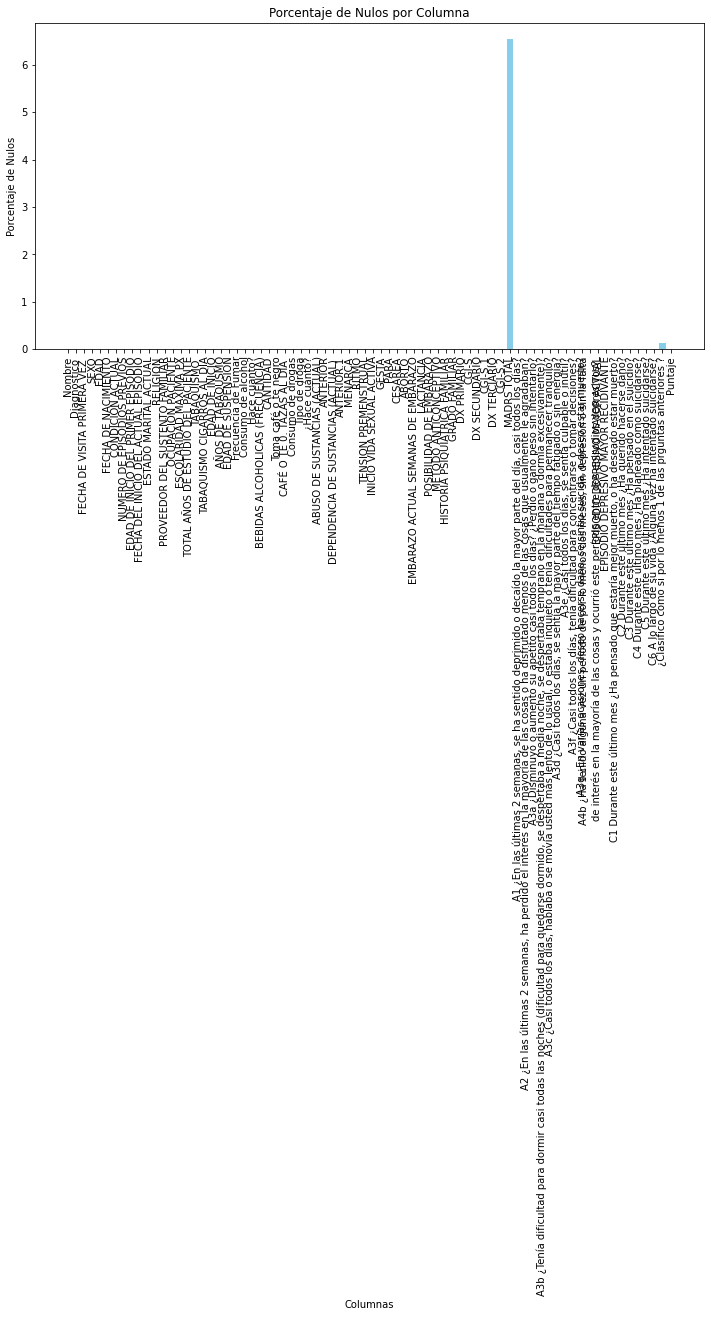

In [14]:
# Configura el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crea un histograma de los porcentajes de valores nulos
plt.bar(proporcion_nulos_por_columna.index, proporcion_nulos_por_columna * 100, color='skyblue')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Nulos')
plt.title('Porcentaje de Nulos por Columna')

# Rotación de las etiquetas en el eje x para mejorar la legibilidad
plt.xticks(rotation=90)

# Muestra la visualización
plt.show()

In [15]:
datos[datos['MADRS TOTAL'].isnull()].sample(5)

,Nombre,Diagnostico,FECHA DE VISITA PRIMERA VEZ,SEXO,EDAD,FECHA DE NACIMIENTO,CONDICION ACTUAL,NUMERO DE EPISODIOS PREVIOS,EDAD DE INICIO DEL PRIMER EPISODIO,FECHA DEL INICIO DEL ACTUAL EPISODIO,ESTADO MARITAL ACTUAL,RELIGION,PROVEEDOR DEL SUSTENTO FAMILIAR,OCUPACIÓN PACIENTE,ESCOLARIDAD MAXIMA PX,TOTAL AÑOS DE ESTUDIO DEL PACIENTE,TABAQUISMO,TABAQUISMO CIGARROS AL DIA,EDAD DE INICIO,AÑOS DE TABAQUSMO,EDAD DE SUSPENSION,Frecuencia de Fumar,Consumo de alcohol,Hace cuanto?,BEBIDAS ALCOHOLICAS (FRECUENCIA),CANTIDAD,Toma café o te negro,CAFÉ O TÉ 0. TAZAS AL DIA,Consumo de drogas,Tipo de droga,¿Hace cuánto?,ABUSO DE SUSTANCIAS (ACTUAL),ANTERIOR,DEPENDENCIA DE SUSTANCIAS (ACTUAL),ANTERIOR.1,MENARCA,RITMO,TENSION PREMENSTRUAL,INICIO VIDA SEXUAL ACTIVA,GESTA,PARA,CESAREA,ABORTO,EMBARAZO ACTUAL SEMANAS DE EMBARAZO,LACTANCIA,POSIBILIDAD DE EMBARAZO,METODO ANTICONCEPTIVO,HISTORIA PSIQUIATRICA FAMILIAR,GRADO FAMILIAR,DX PRIMARIO,CGI-S,DX SECUNDARIO,CGI-S.1,DX TERCIARIO,CGI-S.2,MADRS TOTAL,"A1 ¿En las últimas 2 semanas, se ha sentido deprimido o decaído la mayor parte del día, casi todos los días?","A2 ¿En las últimas 2 semanas, ha perdido el interés en la mayoría de las cosas o ha disfrutado menos de las cosas que usualmente le agradaban?",A3a ¿Disminuyó o aumentó su apetito casi todos los días? ¿Perdió o ganó peso sin intentarlo?,"A3b ¿Tenía dificultad para dormir casi todas las noches (dificultad para quedarse dormido, se despertaba a media noche, se despertaba temprano en la mañana o dormía excesivamente)?","A3c ¿Casi todos los días, hablaba o se movía usted más lento de lo usual, o estaba inquieto o tenía dificultades para permanecer tranquilo?","A3d ¿Casi todos los días, se sentía la mayor parte del tiempo fatigado o sin energía?","A3e ¿Casi todos los días, se sentía culpable o inútil?","A3f ¿Casi todos los días, tenía dificultad para concentrarse o tomar decisiones?","A3g ¿En varias ocasiones, deseó hacerse daño, se sintió suicida, o deseó estar muerto?","A4b ¿Ha tenido alguna vez un período de por lo menos dos meses, sin depresión o sin la falta\nde interés en la mayoría de las cosas y ocurrió este período entre dos episodios depresivos?",EPISODIO DEPRESIVO MAYOR ACTUAL,EPISODIO DEPRESIVO MAYOR RECIDIVANTE,"C1 Durante este último mes ¿Ha pensado que estaría mejor muerto, o ha deseado estar muerto?",C2 Durante este último mes ¿Ha querido hacerse daño?,C3 Durante este último mes ¿Ha pensado en el suicidio?,C4 Durante este último mes ¿Ha planeado cómo suicidarse?,C5 Durante este último mes ¿Ha intentado suicidarse?,C6 A lo largo de su vida ¿Alguna vez ha intentado suicidarse?,¿Clasifico como si por lo menos 1 de las prguntas anteriores ?,Puntaje
237,238,Depresión resistente al tratamiento,11/6/1997,F,33,2/2/1900,Exageración de trastorno crónico,0,28,09/97,Casado(a),Testigo de Jehová,Cónyuge,Dependiente/Desempleado,Secundaria,9,No,0.0,No determinado,0.0,Negado,No determinado,No,0,Una vez al mes o menos,0,Si,1,No,No,0,Negado,Negado,Negado,Negado,12,Histerectomía/Menopausia,Nada,30,3,1,2,0,0,No,Histerectomía,Preservativo,Esquizofrenia,1,Trastorno depresivo episodio único,4,Trastorno de la personalidad no especificado,5,Sin dx terciario,0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1.0,3
278,279,Depresión resistente al tratamiento,4/17/1996,M,63,8/11/1931,Primera aparición sin antecedente,0,63,01/1996,Viudo(a),Testigo de Jehová,Pensión,Dependiente/Desempleado,Preparatoria,9,No,0.0,No determinado,0.0,Negado,No determinado,No,0,No determinado,0,Si,4,No,No,0,Negado,Negado,Negado,Negado,No aplica,No aplica,No aplica,31,No aplica,No aplica,No aplica,No aplica,No aplica,No,No,Preservativo,Alcoholismo,1,Trastorno depresivo episodio único,4,Sin dx secundario,0,Sin dx terciario,0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1.0,3
402,403,Depresión resistente al tratamiento,8/18/1997,F,20,4/30/1977,Significativamente diferente de condición previa,0,19,12/1996,Soltero(a),Católica,Padres,No determinado,Estudios universitarios no terminados,13,No,0.0,No deter

In [16]:
# Se ha tomado la decisión de cambiar todos los nulos de la columna 'MADRS TOTAL' a cero debido a que son 
# aquellos datos que se les pasó por alto colocar el 0
column_name = 'MADRS TOTAL'
datos[column_name] = datos[column_name].fillna(0)

In [17]:
datos[datos['¿Clasifico como si por lo menos 1 de las prguntas anteriores ?'].isnull()].sample(1)

,Nombre,Diagnostico,FECHA DE VISITA PRIMERA VEZ,SEXO,EDAD,FECHA DE NACIMIENTO,CONDICION ACTUAL,NUMERO DE EPISODIOS PREVIOS,EDAD DE INICIO DEL PRIMER EPISODIO,FECHA DEL INICIO DEL ACTUAL EPISODIO,ESTADO MARITAL ACTUAL,RELIGION,PROVEEDOR DEL SUSTENTO FAMILIAR,OCUPACIÓN PACIENTE,ESCOLARIDAD MAXIMA PX,TOTAL AÑOS DE ESTUDIO DEL PACIENTE,TABAQUISMO,TABAQUISMO CIGARROS AL DIA,EDAD DE INICIO,AÑOS DE TABAQUSMO,EDAD DE SUSPENSION,Frecuencia de Fumar,Consumo de alcohol,Hace cuanto?,BEBIDAS ALCOHOLICAS (FRECUENCIA),CANTIDAD,Toma café o te negro,CAFÉ O TÉ 0. TAZAS AL DIA,Consumo de drogas,Tipo de droga,¿Hace cuánto?,ABUSO DE SUSTANCIAS (ACTUAL),ANTERIOR,DEPENDENCIA DE SUSTANCIAS (ACTUAL),ANTERIOR.1,MENARCA,RITMO,TENSION PREMENSTRUAL,INICIO VIDA SEXUAL ACTIVA,GESTA,PARA,CESAREA,ABORTO,EMBARAZO ACTUAL SEMANAS DE EMBARAZO,LACTANCIA,POSIBILIDAD DE EMBARAZO,METODO ANTICONCEPTIVO,HISTORIA PSIQUIATRICA FAMILIAR,GRADO FAMILIAR,DX PRIMARIO,CGI-S,DX SECUNDARIO,CGI-S.1,DX TERCIARIO,CGI-S.2,MADRS TOTAL,"A1 ¿En las últimas 2 semanas, se ha sentido deprimido o decaído la mayor parte del día, casi todos los días?","A2 ¿En las últimas 2 semanas, ha perdido el interés en la mayoría de las cosas o ha disfrutado menos de las cosas que usualmente le agradaban?",A3a ¿Disminuyó o aumentó su apetito casi todos los días? ¿Perdió o ganó peso sin intentarlo?,"A3b ¿Tenía dificultad para dormir casi todas las noches (dificultad para quedarse dormido, se despertaba a media noche, se despertaba temprano en la mañana o dormía excesivamente)?","A3c ¿Casi todos los días, hablaba o se movía usted más lento de lo usual, o estaba inquieto o tenía dificultades para permanecer tranquilo?","A3d ¿Casi todos los días, se sentía la mayor parte del tiempo fatigado o sin energía?","A3e ¿Casi todos los días, se sentía culpable o inútil?","A3f ¿Casi todos los días, tenía dificultad para concentrarse o tomar decisiones?","A3g ¿En varias ocasiones, deseó hacerse daño, se sintió suicida, o deseó estar muerto?","A4b ¿Ha tenido alguna vez un período de por lo menos dos meses, sin depresión o sin la falta\nde interés en la mayoría de las cosas y ocurrió este período entre dos episodios depresivos?",EPISODIO DEPRESIVO MAYOR ACTUAL,EPISODIO DEPRESIVO MAYOR RECIDIVANTE,"C1 Durante este último mes ¿Ha pensado que estaría mejor muerto, o ha deseado estar muerto?",C2 Durante este último mes ¿Ha querido hacerse daño?,C3 Durante este último mes ¿Ha pensado en el suicidio?,C4 Durante este último mes ¿Ha planeado cómo suicidarse?,C5 Durante este último mes ¿Ha intentado suicidarse?,C6 A lo largo de su vida ¿Alguna vez ha intentado suicidarse?,¿Clasifico como si por lo menos 1 de las prguntas anteriores ?,Puntaje
630,631,Trastorno Bipolar,2/11/2017,M,59,11/1/1957,No,0,38,No,Divorciado(a),Católica,Otro,Personal administrativo/Propietario empresa pe...,posgrado,17,No,0.0,No determinado,0.0,Negado,No determinado,Si,15 años,Cuatro o más veces por semana,6,No,0,no,No,0,Negado,Negado,Negado,Negado,No aplica,No aplica,No aplica,No determinado,No aplica,No aplica,No aplica,No aplica,No aplica,No,No,Sin uso de metodo anticonceptivo,Trastorno Bipolar,1,TB1 depresivo,5,Sin dx secundario,0,Sin dx terciario,0,26.0,1,1,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,NaN,0


In [18]:
# El unico nulo que existe en la columna '¿Clasifico como si por lo menos 1 de las prguntas anteriores ?' hay que colocarle
# un cero debido a que esta columna identifica si de las preguntas de C1 a C6 tienen alguna respuesta con si
column_name = '¿Clasifico como si por lo menos 1 de las prguntas anteriores ?'
datos[column_name] = datos[column_name].fillna(0)

#### Nota: no tenemos ningún dato nulo

In [19]:
datos.describe(include= 'object').T

,count,unique,top,freq
Diagnostico,809,3,Depresión resistente al tratamiento,599
FECHA DE VISITA PRIMERA VEZ,809,542,No,144
SEXO,809,4,F,488
EDAD,809,76,43,25
FECHA DE NACIMIENTO,809,675,No,28
CONDICION ACTUAL,809,6,Recurrencia condición previa,246
EDAD DE INICIO DEL PRIMER EPISODIO,809,85,No,44
FECHA DEL INICIO DEL ACTUAL EPISODIO,809,331,No,231
ESTADO MARITAL ACTUAL,809,6,Soltero(a),327
RELIGION,809,20,Católica,507


In [20]:
datos.dtypes

Nombre                                                              int64
Diagnostico                                                        object
FECHA DE VISITA PRIMERA VEZ                                        object
SEXO                                                               object
EDAD                                                               object
                                                                   ...   
C4 Durante este último mes ¿Ha planeado cómo suicidarse?            int64
 C5 Durante este último mes ¿Ha intentado suicidarse?              object
C6 A lo largo de su vida ¿Alguna vez ha intentado suicidarse?       int64
¿Clasifico como si por lo menos 1 de las prguntas anteriores ?    float64
Puntaje                                                             int64
Length: 76, dtype: object

In [21]:
# Pasamos el df a otro para trabajar y preprocesarlo
datos_proc = datos.copy()

In [22]:
# Eliminamos la  columna nombre debido a que es un indice que no es un dato del paciente
datos_proc = datos_proc.drop('Nombre', axis=1)

In [23]:
datos_proc.columns

Index(['Diagnostico ', 'FECHA DE VISITA PRIMERA VEZ ', 'SEXO', 'EDAD',
       'FECHA DE NACIMIENTO', 'CONDICION ACTUAL',
       'NUMERO DE EPISODIOS PREVIOS', 'EDAD DE INICIO DEL PRIMER EPISODIO',
       'FECHA DEL INICIO DEL ACTUAL EPISODIO', 'ESTADO MARITAL ACTUAL',
       'RELIGION', 'PROVEEDOR DEL SUSTENTO FAMILIAR', 'OCUPACIÓN PACIENTE',
       'ESCOLARIDAD MAXIMA PX', 'TOTAL AÑOS DE ESTUDIO DEL PACIENTE',
       'TABAQUISMO ', 'TABAQUISMO CIGARROS AL DIA', 'EDAD DE INICIO',
       'AÑOS DE TABAQUSMO', 'EDAD DE SUSPENSION', 'Frecuencia de Fumar',
       'Consumo de alcohol', 'Hace cuanto?',
       'BEBIDAS ALCOHOLICAS (FRECUENCIA)', 'CANTIDAD', 'Toma café o te negro',
       'CAFÉ O TÉ 0. TAZAS AL DIA ', 'Consumo de drogas', 'Tipo de droga',
       '¿Hace cuánto?', 'ABUSO DE SUSTANCIAS (ACTUAL)', 'ANTERIOR',
       'DEPENDENCIA DE SUSTANCIAS (ACTUAL) ', 'ANTERIOR.1', 'MENARCA', 'RITMO',
       'TENSION PREMENSTRUAL', 'INICIO VIDA SEXUAL ACTIVA', 'GESTA', 'PARA',
       'CESAREA', 

In [24]:
# Renombraremos las columnas para mejor tratamiento
nuevos_nombres = {'FECHA DE VISITA PRIMERA VEZ ': 'fecha_1',
                  'FECHA DE NACIMIENTO': 'fecha_nac',
                  'CONDICION ACTUAL': 'condicion',
                  'ESTADO MARITAL ACTUAL': 'estado_civil',
                  'OCUPACIÓN PACIENTE': 'ocupacion',
                  'ESCOLARIDAD MAXIMA PX': 'escolaridad',
                  'TOTAL AÑOS DE ESTUDIO DEL PACIENTE': 'años_estudio',
                  'A1 ¿En las últimas 2 semanas, se ha sentido deprimido o decaído la mayor parte del día, casi todos los días?': 'A1',
                  'A2 ¿En las últimas 2 semanas, ha perdido el interés en la mayoría de las cosas o ha disfrutado menos de las cosas que usualmente le agradaban?': 'A2',
                  'A3a ¿Disminuyó o aumentó su apetito casi todos los días? ¿Perdió o ganó peso sin intentarlo?': 'A3a',
       'A3b ¿Tenía dificultad para dormir casi todas las noches (dificultad para quedarse dormido, se despertaba a media noche, se despertaba temprano en la mañana o dormía excesivamente)?': 'A3b',
       'A3c ¿Casi todos los días, hablaba o se movía usted más lento de lo usual, o estaba inquieto o tenía dificultades para permanecer tranquilo?' : 'A3c',
       'A3d ¿Casi todos los días, se sentía la mayor parte del tiempo fatigado o sin energía?' : 'A3d',
       'A3e ¿Casi todos los días, se sentía culpable o inútil?': 'A3e',
       'A3f ¿Casi todos los días, tenía dificultad para concentrarse o tomar decisiones?' : 'A3f',
       'A3g ¿En varias ocasiones, deseó hacerse daño, se sintió suicida, o deseó estar muerto?' : 'A3g',
       'A4b ¿Ha tenido alguna vez un período de por lo menos dos meses, sin depresión o sin la falta\nde interés en la mayoría de las cosas y ocurrió este período entre dos episodios depresivos?':'A4b',
       'EPISODIO DEPRESIVO MAYOR ACTUAL' : 'EDMA',
       'EPISODIO DEPRESIVO MAYOR RECIDIVANTE' : 'EDMR',
       'C1 Durante este último mes ¿Ha pensado que estaría mejor muerto, o ha deseado estar muerto?' : 'C1',
       'C2 Durante este último mes ¿Ha querido hacerse daño?': 'C2',
       'C3 Durante este último mes ¿Ha pensado en el suicidio?' : 'C3',
       'C4 Durante este último mes ¿Ha planeado cómo suicidarse?' : 'C4',
       ' C5 Durante este último mes ¿Ha intentado suicidarse?' : 'C5',
       'C6 A lo largo de su vida ¿Alguna vez ha intentado suicidarse?': 'C6',
       '¿Clasifico como si por lo menos 1 de las prguntas anteriores ?' : 'hay_c'}

datos_proc = datos_proc.rename(columns=nuevos_nombres)

In [25]:
datos_proc.columns

Index(['Diagnostico ', 'fecha_1', 'SEXO', 'EDAD', 'fecha_nac', 'condicion',
       'NUMERO DE EPISODIOS PREVIOS', 'EDAD DE INICIO DEL PRIMER EPISODIO',
       'FECHA DEL INICIO DEL ACTUAL EPISODIO', 'estado_civil', 'RELIGION',
       'PROVEEDOR DEL SUSTENTO FAMILIAR', 'ocupacion', 'escolaridad',
       'años_estudio', 'TABAQUISMO ', 'TABAQUISMO CIGARROS AL DIA',
       'EDAD DE INICIO', 'AÑOS DE TABAQUSMO', 'EDAD DE SUSPENSION',
       'Frecuencia de Fumar', 'Consumo de alcohol', 'Hace cuanto?',
       'BEBIDAS ALCOHOLICAS (FRECUENCIA)', 'CANTIDAD', 'Toma café o te negro',
       'CAFÉ O TÉ 0. TAZAS AL DIA ', 'Consumo de drogas', 'Tipo de droga',
       '¿Hace cuánto?', 'ABUSO DE SUSTANCIAS (ACTUAL)', 'ANTERIOR',
       'DEPENDENCIA DE SUSTANCIAS (ACTUAL) ', 'ANTERIOR.1', 'MENARCA', 'RITMO',
       'TENSION PREMENSTRUAL', 'INICIO VIDA SEXUAL ACTIVA', 'GESTA', 'PARA',
       'CESAREA', 'ABORTO', 'EMBARAZO ACTUAL SEMANAS DE EMBARAZO', 'LACTANCIA',
       'POSIBILIDAD DE EMBARAZO', 'METOD

In [26]:
datos_proc.dtypes

Diagnostico      object
fecha_1          object
SEXO             object
EDAD             object
fecha_nac        object
                 ...   
C4                int64
C5               object
C6                int64
hay_c           float64
Puntaje           int64
Length: 75, dtype: object

In [27]:
# Eliminamos algunas columnas debido a que hay muchos pacientes que no proporcionaron esta información y no se puede hacer
# una imputacion debido a que falta mucha información y puede deteriorar la calidad del df
columnas_a_eliminar = ['fecha_1','EDAD DE INICIO', 'EDAD DE SUSPENSION', 'Frecuencia de Fumar',
                       'BEBIDAS ALCOHOLICAS (FRECUENCIA)','Tipo de droga', 'ABUSO DE SUSTANCIAS (ACTUAL)','ANTERIOR',
                       'DEPENDENCIA DE SUSTANCIAS (ACTUAL) ','ANTERIOR.1', 'POSIBILIDAD DE EMBARAZO',
                       'EDAD DE INICIO DEL PRIMER EPISODIO','FECHA DEL INICIO DEL ACTUAL EPISODIO', 'MENARCA', 'RITMO',
                       'TENSION PREMENSTRUAL', 'INICIO VIDA SEXUAL ACTIVA', 'GESTA', 'PARA','CESAREA', 'ABORTO', 
                       'EMBARAZO ACTUAL SEMANAS DE EMBARAZO', 'LACTANCIA','METODO ANTICONCEPTIVO', 'GRADO FAMILIAR',
                       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'hay_c']

datos_proc = datos_proc.drop(columns=columnas_a_eliminar)

In [28]:
datos_proc.shape

(809, 43)

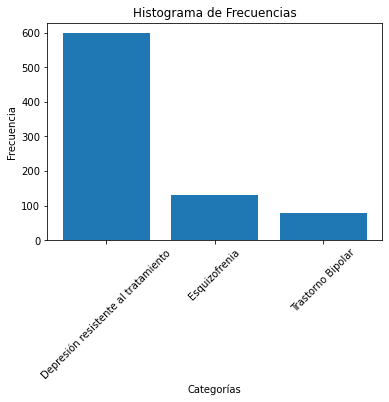

In [29]:
# Contar frecuencias
frecuencias = datos_proc['Diagnostico '].value_counts()

# Crear un histograma
plt.bar(frecuencias.index, frecuencias.values)

# Añadir etiquetas y título
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencias')
plt.xticks(rotation=45) 

# Mostrar el histograma
plt.show()

In [30]:
# Utiliza get_dummies para crear variables ficticias
df_dummies = pd.get_dummies(datos_proc['Diagnostico '], prefix='Diagnostico')

df_dummies = df_dummies.astype(int)

# Concatena las variables ficticias al DataFrame original
datos_proc = pd.concat([datos_proc, df_dummies], axis=1)

datos_proc = datos_proc.drop('Diagnostico ', axis=1)

In [32]:
datos_proc['F'] = datos_proc['SEXO'].str.upper().eq('F').astype(int)

In [33]:
datos_proc = datos_proc.drop('SEXO', axis=1)

In [34]:
filtro_no_numerico = ~datos_proc['EDAD'].str.isnumeric()

# Filtra el DataFrame
resultados = datos_proc[filtro_no_numerico][['EDAD', 'fecha_nac']]

# Muestra los resultados
print(resultados)

               EDAD  fecha_nac
17   No determinado         No
18   No determinado  9/19/1971
386  No determinado         No
689  No determinado         No
702  No determinado         No
713  No determinado   6/4/1952
764  No determinado         No
765  No determinado         No


In [35]:
#mputar 'No determinado' con la diferencia entre el año actual y el año de fecha_nac
datos_proc.loc[datos_proc['EDAD'] == 'No determinado', 'EDAD'] = (
    2024 - pd.to_datetime(datos_proc['fecha_nac'], errors='coerce').dt.year
)

#Calcular el promedio de edades (excluyendo los 'No determinado')
promedio_edades = pd.to_numeric(datos_proc[datos_proc['EDAD'] != 'No determinado']['EDAD'], errors='coerce').mean()

# Imputar el promedio de edades a los registros con 'No determinado' en la columna 'EDAD'
datos_proc.loc[datos_proc['EDAD'] == 'No determinado', 'EDAD'] = promedio_edades

# Convertir la columna 'EDAD' a tipo numérico
datos_proc['EDAD'] = pd.to_numeric(datos_proc['EDAD'], errors='coerce')

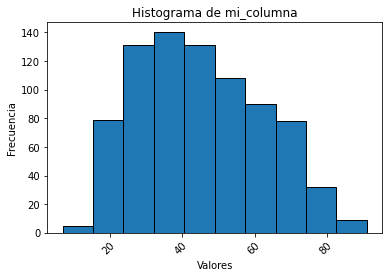

<Figure size 720x720 with 0 Axes>

In [36]:
# Crea un histograma
plt.hist(datos_proc['EDAD'], bins=10, edgecolor='black')

# Añade etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de mi_columna')

# Ajusta la ubicación y la inclinación de las etiquetas del eje x
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

# Ajusta el espacio entre las etiquetas para mejorar la visibilidad
plt.subplots_adjust(bottom=0.15)

# Ajusta el tamaño de la figura para dar más espacio al histograma
plt.figure(figsize=(10, 10))

# Muestra el histograma
plt.show()

In [37]:
# Se elimina esta columna debido a que ya no se va utilizar 
datos_proc = datos_proc.drop('fecha_nac', axis=1)

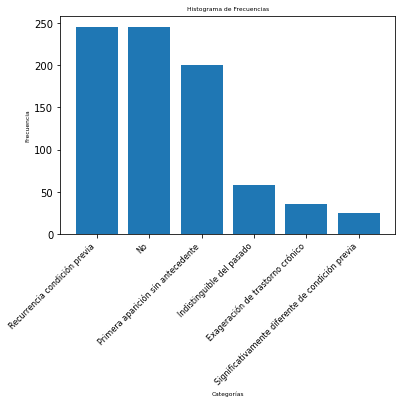

In [38]:
frecuencias = datos_proc['condicion'].value_counts()

# Crear un histograma
plt.bar(frecuencias.index, frecuencias.values)

# Añadir etiquetas y título con tamaños de fuente personalizados
plt.xlabel('Categorías', fontsize=6)
plt.ylabel('Frecuencia', fontsize=6)
plt.title('Histograma de Frecuencias', fontsize=6)

plt.xticks(rotation=45, ha='right', fontsize=8)

# Mostrar el histograma
plt.show()

In [39]:
# Obtén las variables dummy
datos_proc_dummies = pd.get_dummies(datos_proc['condicion'], prefix='condicion')

# Concatena las variables dummy al DataFrame original
datos_proc = pd.concat([datos_proc, datos_proc_dummies], axis=1)

# Elimina la columna original 'Condicion'
datos_proc.drop('condicion', axis=1, inplace=True)

In [40]:
datos_proc['Pareja'] = datos_proc['estado_civil'].apply(lambda x: 1 if x in ['Casado(a)', 'Unión libre'] else 0).astype(int)

datos_proc.drop('estado_civil', axis=1, inplace=True)

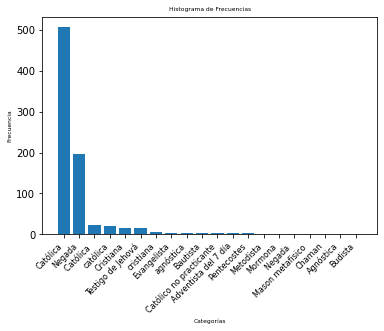

In [41]:
frecuencias = datos_proc['RELIGION'].value_counts()

# Crear un histograma
plt.bar(frecuencias.index, frecuencias.values)

# Añadir etiquetas y título con tamaños de fuente personalizados
plt.xlabel('Categorías', fontsize=6)
plt.ylabel('Frecuencia', fontsize=6)
plt.title('Histograma de Frecuencias', fontsize=6)

plt.xticks(rotation=45, ha='right', fontsize=8)

# Mostrar el histograma
plt.show()

In [42]:
datos_proc['catolica'] = datos_proc['RELIGION'].apply(lambda x: 1 if str(x).lower().startswith('ca') else 0).astype(int)

datos_proc.drop('RELIGION', axis=1, inplace=True)

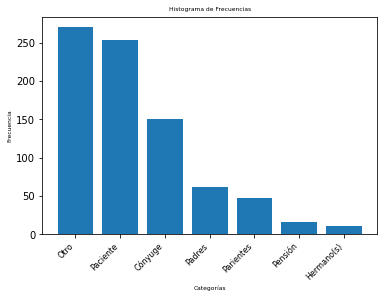

In [43]:
frecuencias = datos_proc['PROVEEDOR DEL SUSTENTO FAMILIAR'].value_counts()

# Crear un histograma
plt.bar(frecuencias.index, frecuencias.values)

# Añadir etiquetas y título con tamaños de fuente personalizados
plt.xlabel('Categorías', fontsize=6)
plt.ylabel('Frecuencia', fontsize=6)
plt.title('Histograma de Frecuencias', fontsize=6)

plt.xticks(rotation=45, ha='right', fontsize=8)

# Mostrar el histograma
plt.show()

In [44]:
datos_proc['proveedor'] = datos_proc['PROVEEDOR DEL SUSTENTO FAMILIAR'].apply(lambda x: 1 if str(x).lower() == 'paciente' else 0).astype(int)

datos_proc.drop('PROVEEDOR DEL SUSTENTO FAMILIAR', axis=1, inplace=True)

In [45]:
# Eliminamos algunas columnas debido a que hay muchos pacientes que no proporcionaron esta información y no se puede hacer
# una imputacion debido a que falta mucha información y puede deteriorar la calidad del df
columnas_a_eliminar = ['ocupacion','escolaridad']

datos_proc = datos_proc.drop(columns=columnas_a_eliminar)

In [46]:
datos_proc['TABAQUISMO '] = datos_proc['TABAQUISMO '].str.strip().replace({'No': 0, 'Si': 1}).astype(int)

In [47]:
datos_proc['Consumo de alcohol'] = datos_proc['Consumo de alcohol'].str.strip().str.lower().replace({'no': 0, 'si': 1}).astype(int)

In [48]:
datos_proc['Hace cuanto?'] = pd.to_numeric(datos_proc['Hace cuanto?'].str.extract('(\d+)', expand=False), errors='coerce').astype(int)

In [49]:
datos_proc['CANTIDAD'] = pd.to_numeric(datos_proc['CANTIDAD'].str.extract('(\d+)', expand=False), errors='coerce').astype(int)

In [50]:
datos_proc['cafe'] = datos_proc['Toma café o te negro'].apply(lambda x: 0 if x.lower() == 'no' else 1).astype(int)

datos_proc.drop('Toma café o te negro', axis=1, inplace=True)

In [51]:
datos_proc['drogas'] = datos_proc['Consumo de drogas'].apply(lambda x: 0 if x.lower() == 'no' else 1).astype(int)

datos_proc.drop('Consumo de drogas', axis=1, inplace=True)

In [52]:
datos_proc['¿Hace cuánto?'] = pd.to_numeric(datos_proc['¿Hace cuánto?'].str.extract('(\d+)', expand=False), errors='coerce').astype(int)

In [53]:
datos_proc['historia'] = datos_proc['HISTORIA PSIQUIATRICA FAMILIAR'].apply(lambda x: 0 if x.lower() == 0 else 1).astype(int)

datos_proc.drop('HISTORIA PSIQUIATRICA FAMILIAR', axis=1, inplace=True)

In [54]:
# Obtén las variables dummy
datos_proc_dummies = pd.get_dummies(datos_proc['DX PRIMARIO'], prefix='DX PRIMARIO')

# Concatena las variables dummy al DataFrame original
datos_proc = pd.concat([datos_proc, datos_proc_dummies], axis=1)

# Elimina la columna original 'Condicion'
datos_proc.drop('DX PRIMARIO', axis=1, inplace=True)

In [55]:
# Obtén las variables dummy
datos_proc_dummies = pd.get_dummies(datos_proc['DX SECUNDARIO'], prefix='DX SECUNDARIO')

# Concatena las variables dummy al DataFrame original
datos_proc = pd.concat([datos_proc, datos_proc_dummies], axis=1)

# Elimina la columna original 'Condicion'
datos_proc.drop('DX SECUNDARIO', axis=1, inplace=True)

In [56]:
# Obtén las variables dummy
datos_proc_dummies = pd.get_dummies(datos_proc['DX TERCIARIO'], prefix='DX TERCIARIO')

# Concatena las variables dummy al DataFrame original
datos_proc = pd.concat([datos_proc, datos_proc_dummies], axis=1)

# Elimina la columna original 'Condicion'
datos_proc.drop('DX TERCIARIO', axis=1, inplace=True)

In [57]:
datos_proc.dtypes

EDAD                                               float64
NUMERO DE EPISODIOS PREVIOS                          int64
años_estudio                                         int64
TABAQUISMO                                           int32
TABAQUISMO CIGARROS AL DIA                         float64
                                                    ...   
DX SECUNDARIO_fobia social                            bool
DX SECUNDARIO_trastorno distímico                     bool
DX TERCIARIO_Sin dx terciario                         bool
DX TERCIARIO_Trastorno de ansiedad generalizada       bool
DX TERCIARIO_Trastorno distimico                      bool
Length: 86, dtype: object

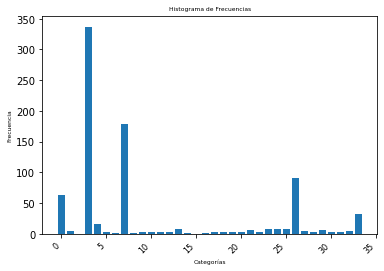

In [59]:
frecuencias = datos_proc['Puntaje'].value_counts()

# Crear un histograma
plt.bar(frecuencias.index, frecuencias.values)

# Añadir etiquetas y título con tamaños de fuente personalizados
plt.xlabel('Categorías', fontsize=6)
plt.ylabel('Frecuencia', fontsize=6)
plt.title('Histograma de Frecuencias', fontsize=6)

plt.xticks(rotation=45, ha='right', fontsize=8)

# Mostrar el histograma
plt.show()

## 2.1. Análisis bivariado y Normalización

###  2.1.1. Análisis bivariado

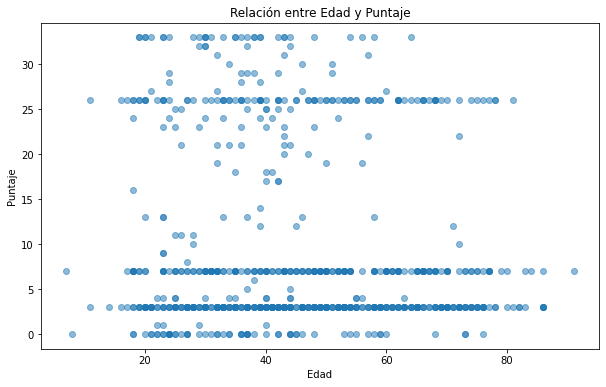

In [61]:
# Supongamos que 'datos_proc' es tu DataFrame
# Ajusta los nombres de las columnas según sea necesario
edad = datos_proc['EDAD']
puntaje = datos_proc['Puntaje']

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(edad, puntaje, alpha=0.5)

# Añadir etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Puntaje')
plt.title('Relación entre Edad y Puntaje')

# Mostrar el gráfico
plt.show()

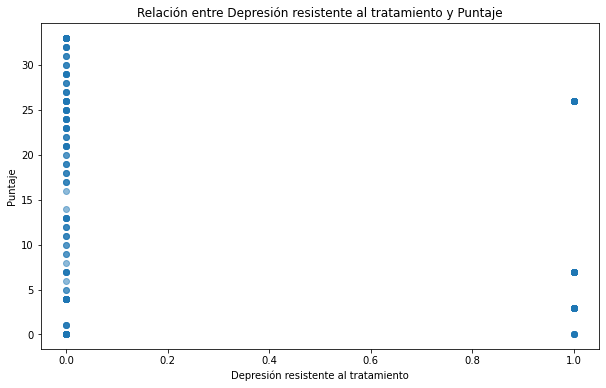

In [62]:
# Supongamos que 'datos_proc' es tu DataFrame
# Ajusta los nombres de las columnas según sea necesario
edad = datos_proc['Diagnostico_Depresión resistente al tratamiento']
puntaje = datos_proc['Puntaje']

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(edad, puntaje, alpha=0.5)

# Añadir etiquetas y título
plt.xlabel('Depresión resistente al tratamiento')
plt.ylabel('Puntaje')
plt.title('Relación entre Depresión resistente al tratamiento y Puntaje')

# Mostrar el gráfico
plt.show()

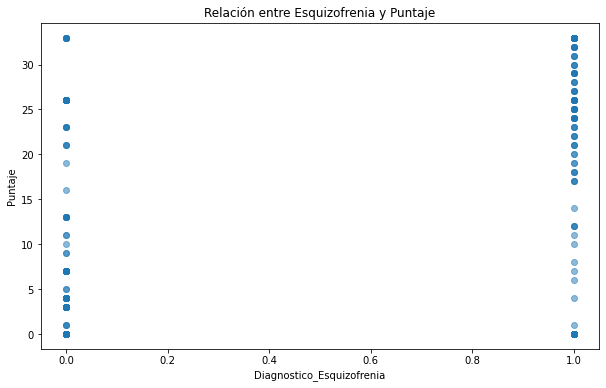

In [63]:
# Supongamos que 'datos_proc' es tu DataFrame
# Ajusta los nombres de las columnas según sea necesario
edad = datos_proc['Diagnostico_Esquizofrenia']
puntaje = datos_proc['Puntaje']

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(edad, puntaje, alpha=0.5)

# Añadir etiquetas y título
plt.xlabel('Diagnostico_Esquizofrenia')
plt.ylabel('Puntaje')
plt.title('Relación entre Esquizofrenia y Puntaje')

# Mostrar el gráfico
plt.show()

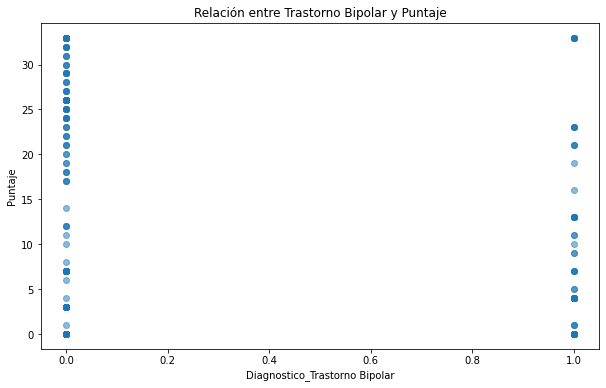

In [64]:
# Supongamos que 'datos_proc' es tu DataFrame
# Ajusta los nombres de las columnas según sea necesario
edad = datos_proc['Diagnostico_Trastorno Bipolar']
puntaje = datos_proc['Puntaje']

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(edad, puntaje, alpha=0.5)

# Añadir etiquetas y título
plt.xlabel('Diagnostico_Trastorno Bipolar')
plt.ylabel('Puntaje')
plt.title('Relación entre Trastorno Bipolar y Puntaje')

# Mostrar el gráfico
plt.show()

###  2.1.2.  Normalización

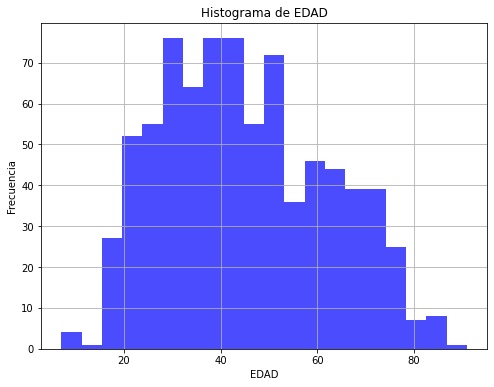

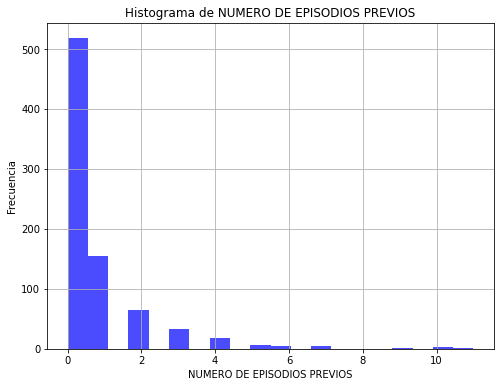

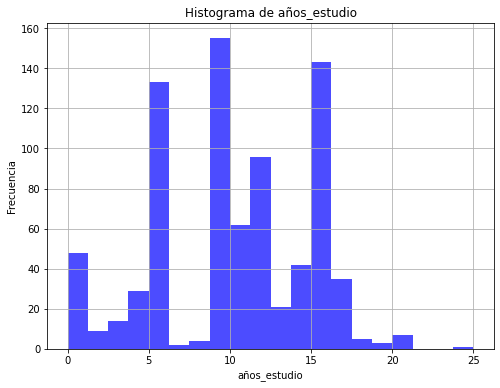

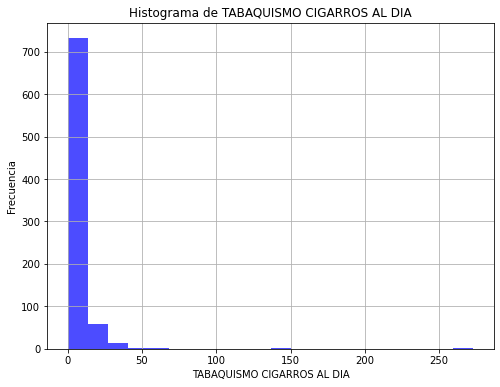

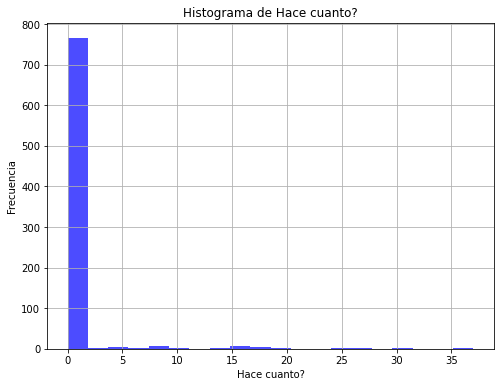

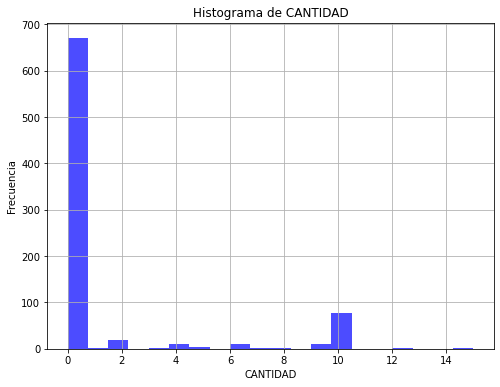

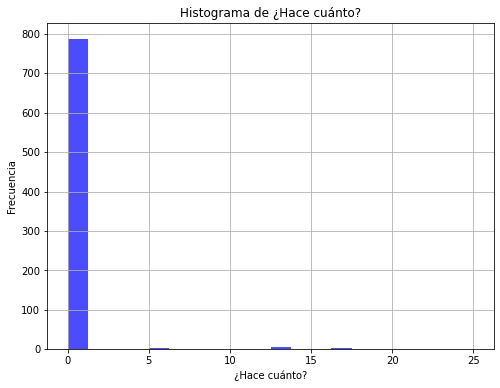

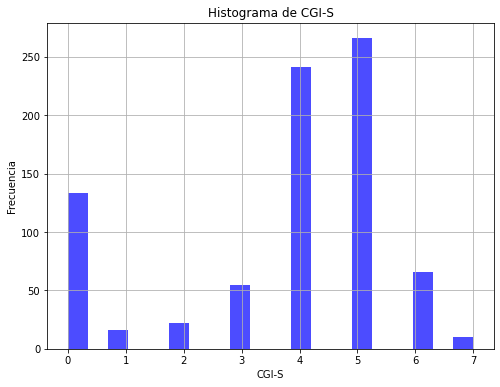

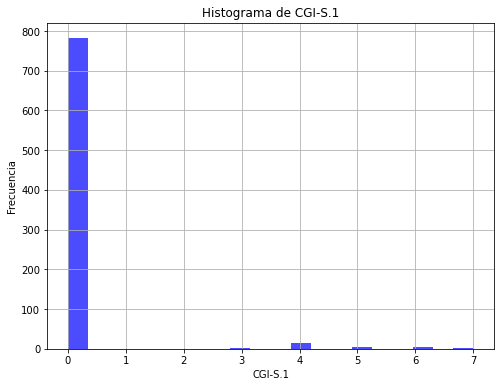

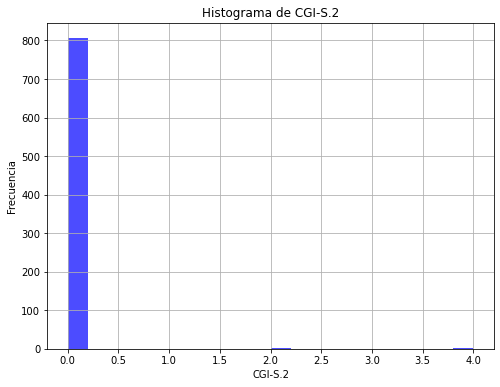

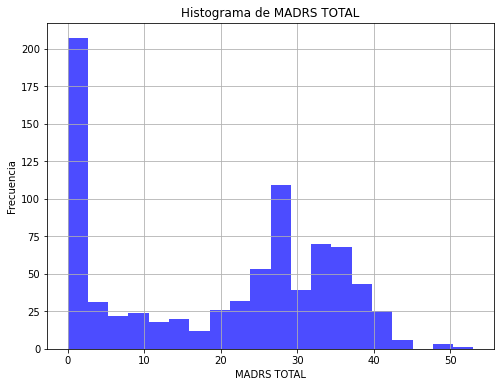

In [65]:
# Supongamos que tu DataFrame se llama datos_proc
columnas_no_binarias = datos_proc[['EDAD', 'NUMERO DE EPISODIOS PREVIOS', 'años_estudio',
                                    'TABAQUISMO CIGARROS AL DIA', 'Hace cuanto?', 'CANTIDAD',
                                    '¿Hace cuánto?', 'CGI-S', 'CGI-S.1', 'CGI-S.2', 'MADRS TOTAL']]

# Crea histogramas para cada columna no binaria
for columna in columnas_no_binarias:
    plt.figure(figsize=(8, 6))
    datos_proc[columna].hist(bins=20, color='blue', alpha=0.7)
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

In [66]:
# Supongamos que tu DataFrame se llama datos_proc
columnas_a_normalizar = ['EDAD', 'NUMERO DE EPISODIOS PREVIOS', 'años_estudio','AÑOS DE TABAQUSMO',
                          'TABAQUISMO CIGARROS AL DIA', 'Hace cuanto?', 'CANTIDAD',
                          '¿Hace cuánto?', 'CGI-S', 'CGI-S.1', 'CGI-S.2', 'MADRS TOTAL']

# Selecciona las columnas que deseas normalizar
datos_a_normalizar = datos_proc[columnas_a_normalizar]

# Inicializa el objeto RobustScaler
robust_scaler = RobustScaler()

# Aplica Robust Scaling a las columnas seleccionadas
datos_norm = robust_scaler.fit_transform(datos_a_normalizar)

# Crea un nuevo DataFrame con los datos normalizados
datos_norm_df = pd.DataFrame(datos_norm, columns=columnas_a_normalizar)

# Elimina las columnas originales del DataFrame original
datos_proc = datos_proc.drop(columnas_a_normalizar, axis=1)

# Concatena el DataFrame original con el DataFrame normalizado
datos_proc = pd.concat([datos_proc, datos_norm_df], axis=1)

# Muestra el DataFrame resultante
print(datos_proc)

     TABAQUISMO   Consumo de alcohol  CAFÉ O TÉ 0. TAZAS AL DIA   A1  A2  A3a  \
0              0                   0                           0   1   1    1   
1              0                   0                           1   1   1    1   
2              0                   0                           0   1   1    1   
3              1                   0                           1   1   1    1   
4              0                   0                           0   1   1    1   
..           ...                 ...                         ...  ..  ..  ...   
804            0                   0                           1   0   0    0   
805            0                   0                           2   0   0    0   
806            0                   1                           0   0   0    0   
807            0                   0                           1   0   0    0   
808            0                   0                           0   0   0    0   

     A3b  A3c  A3d  A3e  A3

In [67]:
# Convertir las columnas booleanas a enteros (0 para False y 1 para True)
columnas_booleanas = datos_proc.select_dtypes(include='bool').columns
datos_proc[columnas_booleanas] = datos_proc[columnas_booleanas].astype(int)

In [68]:
datos_proc.sample(5)

,TABAQUISMO,Consumo de alcohol,CAFÉ O TÉ 0. TAZAS AL DIA,A1,A2,A3a,A3b,A3c,A3d,A3e,A3f,A3g,A4b,EDMA,EDMR,Puntaje,Diagnostico_Depresión resistente al tratamiento,Diagnostico_Esquizofrenia,Diagnostico_Trastorno Bipolar,F,condicion_Exageración de trastorno crónico,condicion_Indistinguible del pasado,condicion_No,condicion_Primera aparición sin antecedente,condicion_Recurrencia condición previa,condicion_Significativamente diferente de condición previa,Pareja,catolica,proveedor,cafe,drogas,historia,DX PRIMARIO_Distimia,DX PRIMARIO_Esquizofrenia,DX PRIMARIO_TB1,DX PRIMARIO_TB1 depresivo,DX PRIMARIO_TB1 hipomaniaco,DX PRIMARIO_TB1 maniaco,DX PRIMARIO_TB2,DX PRIMARIO_TB2 depresivo,DX PRIMARIO_TB2 hipomaniaco,DX PRIMARIO_TB2 maniaco,DX PRIMARIO_Trastorno Bipolar,DX PRIMARIO_Trastorno depresivo episodio único,DX PRIMARIO_Trastorno depresivo mayor recidivante,DX SECUNDARIO_Abuso de alcohol,DX SECUNDARIO_Agorafobia sin trastorno de angustia,DX SECUNDARIO_Antecedentes de trastorno de ansiedad,DX SECUNDARIO_Distimia,DX SECUNDARIO_Distimia,DX SECUNDARIO_Distimia de inicio temprano,DX SECUNDARIO_Distimia primaria de inicio temprano,DX SECUNDARIO_Duelo,DX SECUNDARIO_Duelo no resuelto,DX SECUNDARIO_Duelo no resuleto,DX SECUNDARIO_Fobia social,DX SECUNDARIO_Fobia social,DX SECUNDARIO_Fobia social (provisional),DX SECUNDARIO_Sin dx secundario,DX SECUNDARIO_Trastorno Dístimico,DX SECUNDARIO_Trastorno de angustia con agorafobia,DX SECUNDARIO_Trastorno de angustia con agorafobia,DX SECUNDARIO_Trastorno de ansiedad generalizada,DX SECUNDARIO_Trastorno de la personalidad no especificado,DX SECUNDARIO_Trastorno de la personalidad por dependencia,DX SECUNDARIO_Trastorno distimico,DX SECUNDARIO_Trastorno narcicista de la personalidad,DX SECUNDARIO_Trastorno narcisista de la personalidad,DX SECUNDARIO_Trastorno narcisita de la personalidad,DX SECUNDARIO_fobia social,DX SECUNDARIO_trastorno distímico,DX TERCIARIO_Sin dx terciario,DX TERCIARIO_Trastorno de ansiedad generalizada,DX TERCIARIO_Trastorno distimico,EDAD,NUMERO DE EPISODIOS PREVIOS,años_estudio,AÑOS DE TABAQUSMO,TABAQUISMO CIGARROS AL DIA,Hace cuanto?,CANTIDAD,¿Hace cuánto?,CGI-S,CGI-S.1,CGI-S.2,MADRS TOTAL
803,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.769231,0.0,-0.125,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,-0.800000
546,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,7,1,0,0,1,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.230769,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,-0.033333
702,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,0.0,-0.125,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,-0.800000
420,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,26,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.807692,0.0,-0.125,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,-0.666667
740,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.653846,0.0,-0.500,23.5,5.0,0.0,0.0,0.0,-2.0,0.0,0.0,-0.800000


In [69]:
# Vamos a crear la nueva columna 'riesgo_suicidio' basada en la condición dada
# Definimos una función para asignar el riesgo según las condiciones dadas

def asignar_riesgo(Puntaje):
    if 0 <= Puntaje <= 9:
        return 0
    elif Puntaje > 9:
        return 1
    else:
        return None

# Aplicamos la función a la columna 'Puntaje' para crear la nueva columna 'riesgo_suicidio'
datos_proc['riesgo_suicidio'] = datos_proc['Puntaje'].apply(asignar_riesgo)

In [70]:
# Conteo de valores en la columna 'riesgo_suicidio'
conteo_riesgo = datos_proc['riesgo_suicidio'].value_counts()

# Mostrar el resultado
print(conteo_riesgo)

riesgo_suicidio
0    604
1    205
Name: count, dtype: int64


In [71]:
# Elimina la columna original 'Condicion'
datos_proc.drop('Puntaje', axis=1, inplace=True)

## 3. Ingeniería de carácteristicas

In [72]:
datos_proc.columns

Index(['TABAQUISMO ', 'Consumo de alcohol', 'CAFÉ O TÉ 0. TAZAS AL DIA ', 'A1',
       'A2', 'A3a', 'A3b', 'A3c', 'A3d', 'A3e', 'A3f', 'A3g', 'A4b', 'EDMA',
       'EDMR', 'Diagnostico_Depresión resistente al tratamiento',
       'Diagnostico_Esquizofrenia', 'Diagnostico_Trastorno Bipolar', 'F',
       'condicion_Exageración de trastorno crónico',
       'condicion_Indistinguible del pasado', 'condicion_No',
       'condicion_Primera aparición sin antecedente',
       'condicion_Recurrencia condición previa',
       'condicion_Significativamente diferente de condición previa', 'Pareja',
       'catolica', 'proveedor', 'cafe', 'drogas', 'historia',
       'DX PRIMARIO_Distimia', 'DX PRIMARIO_Esquizofrenia', 'DX PRIMARIO_TB1',
       'DX PRIMARIO_TB1 depresivo', 'DX PRIMARIO_TB1 hipomaniaco',
       'DX PRIMARIO_TB1 maniaco', 'DX PRIMARIO_TB2',
       'DX PRIMARIO_TB2 depresivo', 'DX PRIMARIO_TB2 hipomaniaco',
       'DX PRIMARIO_TB2 maniaco', 'DX PRIMARIO_Trastorno Bipolar',
       'DX 

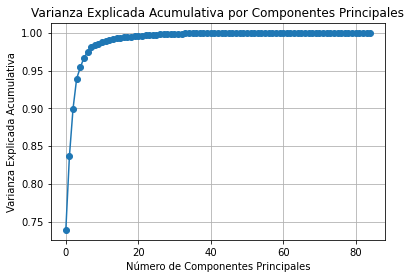

Número de componentes necesarios para alcanzar 95.0% de varianza explicada acumulativa: 5


In [73]:
# Supongamos que 'datos_proc' es tu DataFrame
# Separar las características (X) y la variable objetivo (y)
X = datos_proc.drop('riesgo_suicidio', axis=1)  
y = datos_proc['riesgo_suicidio']

# Imputación utilizando la media
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Obtener la proporción de varianza explicada por cada componente
explained_var_ratio = pca.explained_variance_ratio_

# Graficar la acumulación de varianza explicada
cumulative_var_ratio = np.cumsum(explained_var_ratio)
plt.plot(cumulative_var_ratio, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Varianza Explicada Acumulativa por Componentes Principales')
plt.grid(True)
plt.show()

# Establecer un umbral para la varianza explicada acumulativa deseada (por ejemplo, 0.95)
threshold = 0.95

# Determinar cuántos componentes son necesarios para alcanzar o superar el umbral
num_components_needed = np.argmax(cumulative_var_ratio >= threshold) + 1

print(f"Número de componentes necesarios para alcanzar {threshold * 100}% de varianza explicada acumulativa: {num_components_needed}")

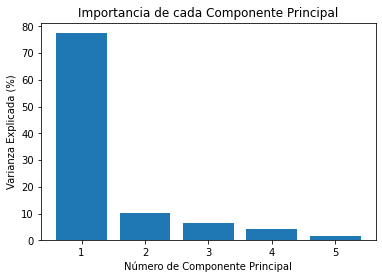

In [74]:
# Supongamos que 'datos_proc' es tu DataFrame
# Separar las características (X) y la variable objetivo (y)
X = datos_proc.drop('riesgo_suicidio', axis=1)  
y = datos_proc['riesgo_suicidio']

# Imputación utilizando la media
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Aplicar PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Crear un nuevo DataFrame con las componentes principales y la variable objetivo
df_pca = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2','Componente 3', 'Componente 4','Componente 5'])
df_pca['riesgo_suicidio'] = y

# Obtener la varianza explicada por cada componente
explained_var = pca.explained_variance_
explained_var_ratio = explained_var / sum(explained_var) * 100  # Calcula la proporción en porcentaje

# Crear un gráfico de barras para visualizar la importancia de cada componente
plt.bar(range(1, len(explained_var_ratio) + 1), explained_var_ratio)
plt.xlabel('Número de Componente Principal')
plt.ylabel('Varianza Explicada (%)')
plt.title('Importancia de cada Componente Principal')
plt.show()

In [75]:
# Supongamos que 'datos_proc' es tu DataFrame
# Separar las características (X) y la variable objetivo (y)
X = datos_proc.drop('riesgo_suicidio', axis=1)  
y = datos_proc['riesgo_suicidio']

# Imputación utilizando la media
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Aplicar PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Obtener las 10 características más importantes para cada componente
top_features = {}
for i, component in enumerate(pca.components_):
    feature_names = X.columns
    component_features = [(feature_names[j], component[j]) for j in range(len(component))]
    component_features.sort(key=lambda x: abs(x[1]), reverse=True)
    top_features[f'Componente {i+1}'] = component_features[:10]

# Mostrar las 10 características más importantes para cada componente
for component, features in top_features.items():
    print(f'{component}: {features}')

Componente 1: [('TABAQUISMO CIGARROS AL DIA', 0.9850165646741615), ('AÑOS DE TABAQUSMO', 0.16358988110582007), ('Hace cuanto?', 0.04372423256138175), ('CANTIDAD', 0.0215156354945288), ('TABAQUISMO ', 0.015557363713485928), ('CGI-S', -0.007845730954458554), ('NUMERO DE EPISODIOS PREVIOS', -0.0068282383474634065), ('CAFÉ O TÉ 0. TAZAS AL DIA ', 0.006492467488923824), ('¿Hace cuánto?', 0.004429599114899855), ('A3d', -0.003666477031951479)]
Componente 2: [('AÑOS DE TABAQUSMO', -0.9392406050619743), ('Hace cuanto?', -0.23372404069120936), ('TABAQUISMO CIGARROS AL DIA', 0.1712492303366696), ('CANTIDAD', -0.16346881017008863), ('TABAQUISMO ', -0.0491429898831414), ('¿Hace cuánto?', -0.04638974496488301), ('CAFÉ O TÉ 0. TAZAS AL DIA ', -0.03614688033776753), ('EDAD', -0.019079646422307004), ('NUMERO DE EPISODIOS PREVIOS', 0.013046114277474742), ('cafe', -0.011547765895432893)]
Componente 3: [('Hace cuanto?', 0.8828064148063078), ('CANTIDAD', 0.2976150326732103), ('AÑOS DE TABAQUSMO', -0.279918

In [79]:
# Supongamos que 'datos_proc' es tu DataFrame después de PCA
# Supongamos que ya has realizado PCA y guardado las componentes principales en 'top_features'

# Crear un conjunto con todas las columnas presentes en 'datos_proc'
columnas_originales = set(datos_proc.columns)

# Filtrar las columnas de 'datos_proc' que se encuentran en las 5 componentes principales sin duplicados
columnas_pca = set()
for features in top_features.values():
    for feature, _ in features:
        columnas_pca.add(feature)

# Obtener la intersección de columnas entre 'datos_proc' y las columnas de PCA
columnas_comunes = list(columnas_pca.intersection(columnas_originales))

# Verificar si hay columnas comunes presentes en 'datos_proc' y seleccionar solo las columnas comunes
if columnas_comunes:
    # Imprimir las columnas utilizadas
    print("Columnas utilizadas:", columnas_comunes)
else:
    print("No hay columnas comunes entre las componentes principales y 'datos_proc'. Verifica los nombres de las columnas.")

Columnas utilizadas: ['Hace cuanto?', 'A4b', 'A3d', 'CANTIDAD', 'CGI-S', 'NUMERO DE EPISODIOS PREVIOS', 'CAFÉ O TÉ 0. TAZAS AL DIA ', 'TABAQUISMO ', 'condicion_No', 'Consumo de alcohol', 'TABAQUISMO CIGARROS AL DIA', 'EDMA', 'EDMR', 'AÑOS DE TABAQUSMO', '¿Hace cuánto?', 'cafe', 'EDAD', 'A3b', 'Diagnostico_Depresión resistente al tratamiento', 'MADRS TOTAL']


In [85]:
# Incluir la columna 'riesgo_suicidio' en las columnas seleccionadas
columnas_seleccionadas = ['riesgo_suicidio'] + columnas_comunes
# Crear un nuevo DataFrame 'df_pca' con las columnas seleccionadas
datos = datos_proc[columnas_seleccionadas]

## 4. Baseline y balanceo de clases

In [86]:
datos.sample(5)

,riesgo_suicidio,Hace cuanto?,A4b,A3d,CANTIDAD,CGI-S,NUMERO DE EPISODIOS PREVIOS,CAFÉ O TÉ 0. TAZAS AL DIA,TABAQUISMO,condicion_No,Consumo de alcohol,TABAQUISMO CIGARROS AL DIA,EDMA,EDMR,AÑOS DE TABAQUSMO,¿Hace cuánto?,cafe,EDAD,A3b,Diagnostico_Depresión resistente al tratamiento,MADRS TOTAL
172,0,0.0,1,1,0.0,1.0,2.0,0,0,0,0,0.0,1,1,0.0,0.0,0,1.000000,1,1,0.066667
396,0,0.0,1,1,0.0,0.0,0.0,0,0,1,0,0.0,1,1,0.0,0.0,0,0.384615,1,1,-0.366667
690,1,0.0,0,0,0.0,-2.0,0.0,0,0,1,0,0.0,0,0,0.0,0.0,0,-0.961538,0,0,-0.800000
749,0,0.0,0,0,0.0,-2.0,0.0,0,0,1,0,0.0,0,0,0.0,0.0,0,-0.346154,0,0,-0.800000
166,0,0.0,1,1,0.0,0.5,1.0,0,0,0,0,0.0,1,1,0.0,0.0,0,1.115385,1,1,-0.233333


In [89]:
# Suponiendo que 'df_pca' es tu DataFrame
conteo_riesgo_suicidio = df_pca['riesgo_suicidio'].value_counts()

# Mostrar el conteo de valores
print(conteo_riesgo_suicidio)

riesgo_suicidio
0    604
1    205
Name: count, dtype: int64


In [88]:
# Suponiendo que 'df_pca' es tu DataFrame
porcentaje_riesgo_suicidio = df_pca['riesgo_suicidio'].value_counts(normalize=True) * 100

# Mostrar el porcentaje de cada clase
print(porcentaje_riesgo_suicidio)

riesgo_suicidio
0    74.660074
1    25.339926
Name: proportion, dtype: float64


In [92]:
# Suponiendo que 'df_pca' es tu DataFrame
X = datos.drop('riesgo_suicidio', axis=1)
y = datos['riesgo_suicidio']

# Utilizar RandomOverSampler para realizar sobremuestreo
sampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X, y)

# Crear un nuevo DataFrame con las características y la variable objetivo después del sobremuestreo
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['riesgo_suicidio'] = y_resampled

# Verificar el balance de clases después del sobremuestreo
porcentaje_riesgo_suicidio_resampled = df_resampled['riesgo_suicidio'].value_counts(normalize=True) * 100
print(porcentaje_riesgo_suicidio_resampled)

riesgo_suicidio
0    50.0
1    50.0
Name: proportion, dtype: float64


In [93]:
df_resampled

(1208, 21)

In [102]:
# Supongamos que ya tienes X_train, X_test, y_train, y_test definidos

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Crear un imputador
imputer = SimpleImputer(strategy='mean')

# Aplicar la imputación a X_train y X_test
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Crear y entrenar el modelo de Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_rf = model_rf.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)

# Imprimir las métricas
print(f'Precisión del modelo: {accuracy * 100:.2f}%')
print(f'F1-score del modelo: {f1:.2f}')
print(f'Recall del modelo: {recall:.2f}')

# Obtener y imprimir la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:')
print(conf_matrix)

Precisión del modelo: 93.80%
F1-score del modelo: 0.94
Recall del modelo: 0.96
Confusion Matrix:
[[113  10]
 [  5 114]]


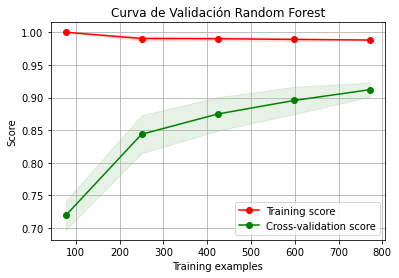

In [100]:
# Supongamos que ya tienes tu modelo_rf entrenado y tus conjuntos de datos X_train, y_train

# Función para plotear la curva de validación
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Crear la curva de validación
plot_learning_curve(model_rf, "Curva de Validación Random Forest", X_train, y_train, cv=5, n_jobs=-1)

plt.show()


## 5. Modelos de Machine Learning y fine tunning

### 5.1. Modelos de Machine Learning

In [107]:
datos = pd.DataFrame(df_resampled)

In [117]:
# Función para evaluar el rendimiento de un modelo de clasificación
def model_performance_classification(model, predictors, target):
    pred = model.predict(predictors)
    recall = recall_score(target, pred, average='macro')
    precision = precision_score(target, pred, average='macro')
    f1 = f1_score(target, pred, average='macro')
    acc = accuracy_score(target, pred)

    df_perf = pd.DataFrame(
        {
            "Precision": precision,
            "Recall": recall,
            "Accuracy": acc,
            "F1_score": f1,
        },
        index=[0],
    )
    return df_perf

# Tratar los valores faltantes (rellenar con la media, por ejemplo)
datos.fillna(datos.mean(), inplace=True)

# Separar las características (X) y la variable objetivo (y)
X = datos.drop('riesgo_suicidio', axis=1)
y = datos['riesgo_suicidio']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar los modelos con medición del tiempo
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear', C=1.0, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42),
}

results = []

for name, model in models.items():
    start_time = time.time()  # Registrar el tiempo de inicio
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)
    end_time = time.time()  # Registrar el tiempo de finalización

    training_time = end_time - start_time  # Calcular el tiempo total de entrenamiento

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    model_perf = model_performance_classification(model, X_test, y_test)
    model_perf.insert(0, "Model", name)
    model_perf["Training Time (s)"] = training_time
    results.append(model_perf)

    print(f"Model: {name}")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", classification_rep)
    print(f"Training Time: {training_time:.2f} seconds")
    print("=" * 50)

# Convertir la lista de resultados en un DataFrame
df_results = pd.concat(results, ignore_index=True)
print("\nTabla de Métricas:")
print(df_results)

Model: Random Forest
Accuracy: 0.9380165289256198
Confusion Matrix:
 [[113  10]
 [  5 114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       123
           1       0.92      0.96      0.94       119

    accuracy                           0.94       242
   macro avg       0.94      0.94      0.94       242
weighted avg       0.94      0.94      0.94       242

Training Time: 0.19 seconds
Model: Decision Tree
Accuracy: 0.8760330578512396
Confusion Matrix:
 [[ 99  24]
 [  6 113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.87       123
           1       0.82      0.95      0.88       119

    accuracy                           0.88       242
   macro avg       0.88      0.88      0.88       242
weighted avg       0.88      0.88      0.88       242

Training Time: 0.01 seconds
Model: KNN
Accuracy: 0.7851239669421488
Confusion Matrix:


### 5.2. Ajustando los dos mejores modelos

In [120]:
# Definir los parámetros que deseas probar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Crear el modelo de RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Medir el tiempo de inicio
start_time = time.time()

# Realizar la búsqueda de hiperparámetros en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Medir el tiempo de finalización
end_time = time.time()

# Calcular el tiempo total de entrenamiento
training_time = end_time - start_time

# Obtener el mejor modelo y sus hiperparámetros
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Hacer predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_rf_model.predict(X_test)

# Evaluar el rendimiento del mejor modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Mostrar resultados
print("Mejores hiperparámetros:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print(f"Training Time: {training_time:.2f} seconds")

Mejores hiperparámetros: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9421487603305785
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       123
           1       0.93      0.96      0.94       119

    accuracy                           0.94       242
   macro avg       0.94      0.94      0.94       242
weighted avg       0.94      0.94      0.94       242

Training Time: 829.92 seconds


In [121]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import time

# Definir los parámetros que deseas probar
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'max_iter': [500, 1000, 1500],
    'alpha': [0.0001, 0.001, 0.01],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Crear el modelo de MLPClassifier
mlp_model = MLPClassifier(random_state=42)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Medir el tiempo de inicio
start_time = time.time()

# Realizar la búsqueda de hiperparámetros en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Medir el tiempo de finalización
end_time = time.time()

# Calcular el tiempo total de entrenamiento
training_time = end_time - start_time

# Obtener el mejor modelo y sus hiperparámetros
best_mlp_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Hacer predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_mlp_model.predict(X_test)

# Evaluar el rendimiento del mejor modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Mostrar resultados
print("Mejores hiperparámetros:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print(f"Training Time: {training_time:.2f} seconds")

Mejores hiperparámetros: {'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
Accuracy: 0.8966942148760331
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.90       123
           1       0.87      0.92      0.90       119

    accuracy                           0.90       242
   macro avg       0.90      0.90      0.90       242
weighted avg       0.90      0.90      0.90       242

Training Time: 4216.01 seconds


### 6. Modelos de ensamble

In [128]:
# Función para evaluar el rendimiento de un modelo de clasificación
def model_performance_classification(model, predictors, target):
    pred = model.predict(predictors)
    recall = recall_score(target, pred, average='macro')
    precision = precision_score(target, pred, average='macro')
    f1 = f1_score(target, pred, average='macro')
    acc = accuracy_score(target, pred)

    df_perf = pd.DataFrame(
        {
            "Precision": precision,
            "Recall": recall,
            "Accuracy": acc,
            "F1_score": f1,
        },
        index=[0],
    )
    return df_perf

# Tratar los valores faltantes (rellenar con la media, por ejemplo)
datos.fillna(datos.mean(), inplace=True)

# Separar las características (X) y la variable objetivo (y)
X = datos.drop('riesgo_suicidio', axis=1)
y = datos['riesgo_suicidio']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar los modelos con medición del tiempo
models = {
    'Random Forest': RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, 
                                           max_features='auto', min_samples_leaf=1, min_samples_split=2,
                                           bootstrap=True, random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear', C=1.0, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, alpha=0.0001, 
                                    solver='adam', learning_rate='constant', random_state=42),
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42),
}

results = []

for name, model in models.items():
    start_time = time.time()  # Registrar el tiempo de inicio
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)
    end_time = time.time()  # Registrar el tiempo de finalización

    training_time = end_time - start_time  # Calcular el tiempo total de entrenamiento

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    model_perf = model_performance_classification(model, X_test, y_test)
    model_perf.insert(0, "Model", name)
    model_perf["Training Time (s)"] = training_time
    results.append(model_perf)

    print(f"Model: {name}")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", classification_rep)
    print(f"Training Time: {training_time:.2f} seconds")
    print("=" * 50)

    # Bagging
    bagging_model = BaggingClassifier(base_estimator=model, n_estimators=10, random_state=42)
    start_time = time.time()
    bagging_model.fit(X_train, y_train)
    y_pred_bagging = bagging_model.predict(X_test)
    end_time = time.time()
    training_time_bagging = end_time - start_time

    accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
    conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)
    classification_rep_bagging = classification_report(y_test, y_pred_bagging)

    bagging_perf = model_performance_classification(bagging_model, X_test, y_test)
    bagging_perf.insert(0, "Model", f"{name} (Bagging)")
    bagging_perf["Training Time (s)"] = training_time_bagging
    results.append(bagging_perf)

    print(f"{name} (Bagging) Model:")
    print("Accuracy:", accuracy_bagging)
    print("Confusion Matrix:\n", conf_matrix_bagging)
    print("Classification Report:\n", classification_rep_bagging)
    print(f"Training Time: {training_time_bagging:.2f} seconds")
    print("=" * 50)

    # Boosting
    # Clasificador base para AdaBoost
    base_classifier = DecisionTreeClassifier(random_state=42)

    # AdaBoost Classifier
    boosting_model = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)
    start_time = time.time()
    boosting_model.fit(X_train, y_train)
    y_pred_boosting = boosting_model.predict(X_test)
    end_time = time.time()
    training_time_boosting = end_time - start_time

    accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
    conf_matrix_boosting = confusion_matrix(y_test, y_pred_boosting)
    classification_rep_boosting = classification_report(y_test, y_pred_boosting)

    boosting_perf = model_performance_classification(boosting_model, X_test, y_test)
    boosting_perf.insert(0, "Model", f"{name} (Boosting)")
    boosting_perf["Training Time (s)"] = training_time_boosting
    results.append(boosting_perf)

    print(f"{name} (Boosting) Model:")
    print("Accuracy:", accuracy_boosting)
    print("Confusion Matrix:\n", conf_matrix_boosting)
    print("Classification Report:\n", classification_rep_boosting)
    print(f"Training Time: {training_time_boosting:.2f} seconds")
    print("=" * 50)

# Configuración para evitar advertencias de LightGBM
lgb_params = {
    'verbose': -1,
    # Otras configuraciones de LightGBM...
}

# Crear y entrenar el modelo LightGBM
lgb_model = lgb.LGBMClassifier(**lgb_params)
lgb_model.fit(X_train, y_train)

# Hacer predicciones y evaluar el rendimiento
y_pred_lgb = lgb_model.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
classification_rep_lgb = classification_report(y_test, y_pred_lgb)

# Mostrar resultados
print("LightGBM Model:")
print("Accuracy:", accuracy_lgb)
print("Classification Report:\n", classification_rep_lgb)

# Stacking Classifier
stacking_models = [
    RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, 
                           max_features='auto', min_samples_leaf=1, min_samples_split=2,
                           bootstrap=True, random_state=42),
    MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, alpha=0.0001, 
                  solver='adam', learning_rate='constant', random_state=42)
]

stacking_model = StackingClassifier(classifiers=stacking_models, meta_classifier=LogisticRegression())

start_time = time.time()  # Registrar el tiempo de inicio
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)
end_time = time.time()  # Registrar el tiempo de finalización

training_time_stacking = end_time - start_time  # Calcular el tiempo total de entrenamiento

accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)
classification_rep_stacking = classification_report(y_test, y_pred_stacking)

stacking_perf = model_performance_classification(stacking_model, X_test, y_test)
stacking_perf.insert(0, "Model", "Stacking")
stacking_perf["Training Time (s)"] = training_time_stacking
results.append(stacking_perf)

print("Stacking Model:")
print("Accuracy:", accuracy_stacking)
print("Confusion Matrix:\n", conf_matrix_stacking)
print("Classification Report:\n", classification_rep_stacking )
print(f"Training Time: {training_time_stacking:.2f} seconds")
print("=" * 50)

# Convertir la lista de resultados en un DataFrame
df_results = pd.concat(results, ignore_index=True)

# Ordenar el DataFrame por la columna "Accuracy" de mayor a menor
df_results_sorted = df_results.sort_values(by='Accuracy', ascending=False)

# Mostrar la tabla de métricas ordenada
print("\nTabla de Métricas (Ordenada por Accuracy de mayor a menor):")
print(df_results_sorted)

Model: Random Forest
Accuracy: 0.9421487603305785
Confusion Matrix:
 [[114   9]
 [  5 114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       123
           1       0.93      0.96      0.94       119

    accuracy                           0.94       242
   macro avg       0.94      0.94      0.94       242
weighted avg       0.94      0.94      0.94       242

Training Time: 0.42 seconds
Random Forest (Bagging) Model:
Accuracy: 0.9214876033057852
Confusion Matrix:
 [[114   9]
 [ 10 109]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       123
           1       0.92      0.92      0.92       119

    accuracy                           0.92       242
   macro avg       0.92      0.92      0.92       242
weighted avg       0.92      0.92      0.92       242

Training Time: 3.65 seconds
Random Forest (Boosting) Model:
Accuracy: 0.9256

## 7. Gráficos finales

In [141]:
# Tratar los valores faltantes (rellenar con la media, por ejemplo)
datos.fillna(datos.mean(), inplace=True)

# Separar las características (X) y la variable objetivo (y)
X = datos.drop('riesgo_suicidio', axis=1)
y = datos['riesgo_suicidio']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros específicos para el Random Forest
rf_params = {
    'n_estimators': 200,
    'criterion': 'entropy',
    'max_depth': None,
    'max_features': 'auto',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'bootstrap': True,
    'random_state': 42
}

# Crear y entrenar el modelo Random Forest con medición del tiempo
rf_model = RandomForestClassifier(**rf_params)
start_time = time.time()  # Registrar el tiempo de inicio
rf_model.fit(X_train, y_train)  # Ajustar el modelo
y_pred_rf = rf_model.predict(X_test)
end_time = time.time()  # Registrar el tiempo de finalización

training_time_rf = end_time - start_time  # Calcular el tiempo total de entrenamiento

# Evaluar el rendimiento del modelo Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Mostrar resultados del modelo Random Forest
print("Random Forest Model:")
print("Mejores hiperparámetros:", rf_params)
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", classification_rep_rf)
print(f"Training Time: {training_time_rf:.2f} seconds")

Random Forest Model:
Mejores hiperparámetros: {'n_estimators': 200, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'bootstrap': True, 'random_state': 42}
Accuracy: 0.9421487603305785
Confusion Matrix:
 [[114   9]
 [  5 114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       123
           1       0.93      0.96      0.94       119

    accuracy                           0.94       242
   macro avg       0.94      0.94      0.94       242
weighted avg       0.94      0.94      0.94       242

Training Time: 0.36 seconds


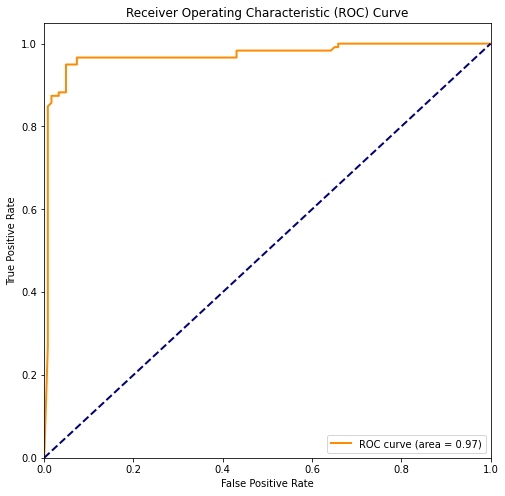

In [130]:
# Suponiendo que ya tienes el modelo Random Forest entrenado (rf_model) y las predicciones (y_pred_rf)
# rf_model y y_pred_rf se obtuvieron en el código anterior

# Obtener las probabilidades de predicción para la clase positiva
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

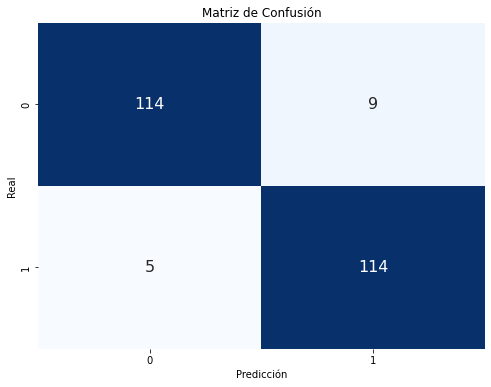

In [136]:
# Suponiendo que ya tienes las predicciones (y_pred) y las etiquetas reales (y_test)
# y_pred y y_test se obtuvieron en el código anterior

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Crear un mapa de calor con colores personalizados
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

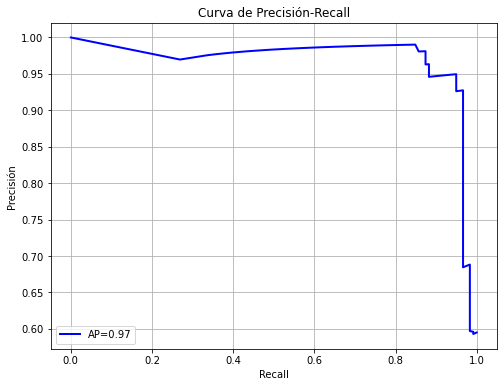

Average Precision (AP): 0.9652


In [138]:
# Obtener las probabilidades de predicción para la clase positiva
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Calcular la curva de precisión-recall
precision, recall, _ = precision_recall_curve(y_test, y_prob_rf)

# Calcular el Average Precision (AP)
ap_rf = average_precision_score(y_test, y_prob_rf)

# Graficar la curva de precisión-recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'AP={ap_rf:.2f}')
plt.title('Curva de Precisión-Recall')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar el valor de Average Precision (AP)
print(f'Average Precision (AP): {ap_rf:.4f}')

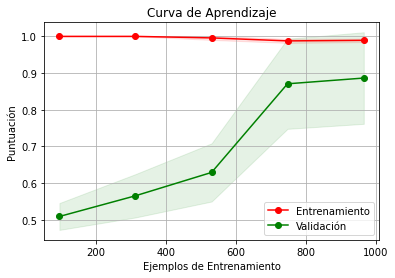

In [142]:
# Definir la función para graficar la curva de aprendizaje
def plot_learning_curve(estimator, X, y, title="Curva de Aprendizaje", ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Genera una curva de aprendizaje para un estimador dado.
    
    Parameters:
    - estimator: Estimador para el cual generar la curva de aprendizaje.
    - X: Datos de entrada.
    - y: Etiquetas.
    - title: Título del gráfico.
    - ylim: (Opcional) Rango del eje y.
    - cv: (Opcional) Estrategia de validación cruzada.
    - n_jobs: (Opcional) Número de trabajos a ejecutar en paralelo.
    - train_sizes: (Opcional) Fracciones de tamaños de conjuntos de entrenamiento.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de Entrenamiento")
    plt.ylabel("Puntuación")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validación")

    plt.legend(loc="best")
    return plt

# Crear y graficar la curva de aprendizaje
plot_learning_curve(rf_model, X, y)
plt.show()

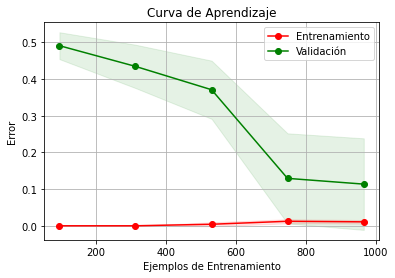

In [143]:
# Definir la función para graficar la curva de aprendizaje
def plot_learning_curve(estimator, X, y, title="Curva de Aprendizaje", ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Genera una curva de aprendizaje para un estimador dado.
    
    Parameters:
    - estimator: Estimador para el cual generar la curva de aprendizaje.
    - X: Datos de entrada.
    - y: Etiquetas.
    - title: Título del gráfico.
    - ylim: (Opcional) Rango del eje y.
    - cv: (Opcional) Estrategia de validación cruzada.
    - n_jobs: (Opcional) Número de trabajos a ejecutar en paralelo.
    - train_sizes: (Opcional) Fracciones de tamaños de conjuntos de entrenamiento.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de Entrenamiento")
    plt.ylabel("Error")
    
    train_sizes, train_errors, test_errors = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring='neg_mean_squared_error')  # Utilizando la métrica de error

    train_errors_mean = -np.mean(train_errors, axis=1)
    train_errors_std = np.std(train_errors, axis=1)
    test_errors_mean = -np.mean(test_errors, axis=1)
    test_errors_std = np.std(test_errors, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_errors_mean - train_errors_std,
                     train_errors_mean + train_errors_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_errors_mean - test_errors_std,
                     test_errors_mean + test_errors_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_errors_mean, 'o-', color="r",
             label="Entrenamiento")
    plt.plot(train_sizes, test_errors_mean, 'o-', color="g",
             label="Validación")

    plt.legend(loc="best")
    return plt

# Crear y graficar la curva de aprendizaje con errores
plot_learning_curve(rf_model, X, y)
plt.show()

### Conclusiones Avance 1

* Revisando el archivo, me he enontrado que de las 76 columnas que posee, solamente 28 tienen menos del 17% de registros nulos, por lo que me parece que se pierde mucha información, esto contando que solo tenemos 810 registros.
* He logrado revisar las estadisticas resumidas
* Hay correlación entre varias variables, sobre todos en las dummies que son practicamente preguntas que se le han hecho a los pacientes de si y no, sin embargo esto se ha binarizado a 1 y 0.
* También hay algunos patrones de ausencias, sobre todo en los últimos registros.
* Como se ha podido observar existen desequilibrio en las clases objetivos la cual sería la columna de puntaje, por lo que voy a revisar con el equipo de trabajo del hospital si se puede categorizar en rangos.
* Al tener muchos problemas de nulos voy a tener una sesión con el equipo del trabajo de el Hospital esta semana para ver que cambios se pueden hacer.

### Conclusiones Avance 2

* En esta semana tuve una reunión con el equipo para la toma de decisiones, y el cambio con algunos nulos que existían.
* He eliminado la columna nombre debido a que solo es un indice y no aporta ninguna carácteristicas de los pacientes.
* El diagnóstico los he realizado en dummys donde se hicieron tres nuevas caracteristicas binarias correspondientes 
a los tres diagnosticos principales en estudios.
* Se han eliminado aproximadamente 10 columnas debido a la falta de información, la cual aportaba ruido y afectaba la
calidad del dataframe en estudio
* Hubo mucha limpieza como eliminar datos por ejemplo "hace 10 años", los he cambiado por un 10.
* Se han realizado varias columnas dummys , por ejemplo, en el caso de el sexo paso de una columna object donde los valores eran F y M, a una sola columna llamada F donde si tiene un 1 es Femenino, esto debido a que esta es la clase mayoritaria.
* Se ha normalizado las columnas no binarias con el metodo Robust Scaling (Normalización Robusta)debido a que este aunque es similar a Z-Score, utiliza la mediana y el rango intercuartílico en lugar de la media y la desviación estándar,siendo útil cuando hay presencia de valores atípicos.
* He utilizado un gráfico de codo y el metodo PCA , para analizar cuales son las variables que tienen mayor poder predictivo y aportan más variación a mi modelo, esto para discriminar otras variables.

### Conclusiones Avance 3

* En esta semana he tenido reunión con el equipo de Medicos, donde hemos pasado la variable objetivo de un Puntaje de 1 a 33 , a una categoria de riesgo donde 0 es nulo, 1 es leve . 2 es Moderado y 3 es Alto/Severo, por lo tanto esto va a ser que el modelo de predicción se más eficaz y eficiente.
* Se ha utilizado el algoridmo de random forest debido a que necesitamos un modelo de clasificación multiclase, ya que no es binario donde el modelo de regresión o logistica pudieron haber dado mejores resultados.
* Se ha eliminado del dataset una carácteristica más, la cual es el puntaje, esto debido a que la columna objetivo riesgo_suicidio es calculada a traves de esta por lo que podría afectar el desempeño y ser una variable muy explicativa, sesgandonos el modelo.
* El modelo podría estar sobreentrenado, esto debido al desempeño obtenido,y que es casi perfecto en el entrenamiento, para el próximo avance trabajaré con este problema.
* La metrica adecuada para este problema definitivamente es accuracy debido a que se está hablando sobre el tema salud, por lo tanto se tratará de tener una precisión muy exacta.
* El desempeño minimo deseable será entre 0.9 y 1 , lo cuál igualmente lo conversaré esta semana con el Grupo medico, además si este modelo sale a producción será altamente supervisado y teniendo un nuevo "check" para verificar el rendimiento con un Medico.

### Conclusiones Avance 4

* En esta semana tuvimos otro cambio debido a que logramos pasar de tener 4 clases a 3 clases donde los ceros y unos pasaron a ceros, la cual será un riesgo leve, la clase 1 un riesgo moderado y 2 un alto riesgo de suicidio.
* Se ha robustecido el dataset colocando nuevas dummies del dataset original.
* Se han realizado 10 algoritmos de machine learning de clasificación multiclase donde los que han tenido mejor desempeño son el Random Forest y el SVM, donde el primero ha tenido un accuracy de 0.66, y el SVM de 0.63 . Cabe destacar que en ambos la precisión es mucho más alta en la clase 2 , seguida de la clase 1.
* Para el ajuste fino en el Random Forest había probado varios balanceos como el SMOTE,SmoteTomek y el Class Weight, el cual tuvo mejor desempeño el ultimo debido a la naturaleza de los datos, ádemas entre gridsearch y randomized search utilicé el primero para lograr optimizar los hiperparametros, sin embargo el modelo no tuvo mejoras,
* Para el ajuste fino del SVM, utilicé regularización y también varias tecnicas de balanceo, sin embargo también no tuvo mejoras considerables.
* He considerado dejar el modelo a que solamente prediga cual paciente va tener un alto riesgo de suicidio, para cambiar el problema a una clasificación binaria, para mejorar el rendimiento, sin embargo, esta semana lo hablaré con el equipo medico.
* Al final hice una prueba para ver si en realidad funciona hacer el cambio a dos clases, y solo en el random forest, sin el ajuste fino me logró dar un 0.87 de accuracy, lo cuál pudiera subir con el ajuste de hiperparametros, espero tener este modelo mejorado con los cambios que voya negociar esta semana.

### Conclusiones Avance 5

Se incluyen comentarios de los avances anteriores debido a que tenía correcciones que mejorar en el proyecto, por último se tienen las conclusiones de este avance. Cabe destacar que esta semana tuve reunión con el equipo medico para comentarles que las pruebas de la semana pasada me indicaban que era mejor trasladar el problema de multiclase a binario (dos clases), donde se iban a unificar las clases nulas-leve y moderado y por otr lado iba a estar la clase de riesgo alto, todos me han dado el visto bueno debido que clinicamente este es el riesgo que siempre se busca prevenir.

#### EDA

* He eliminado las impresiones innecesarias de columnas luego de imputar faltantes
* He utilizado la traspuestas con el include = 'object' , esto para poder revisar las columnas que no son númericas
* He utilizado un unico drop para todas las columnas a eliminar, sin embargo, hay otros drops más adelante debido a que son columnas que se transforman en dummies o necesitan otra transformación.
* Ya son legibles las etiquetas de edad, se observa que es una distribución normal,
* Ya incluí el análisis bivariado donde se observa que el rango de edad de los riesgos más altos están entre los 20 y 40 años, ádemas la esquizofrenia tiene más impacto en los porcentajes altos, seguido de la bipolaridad y por último la depresión.
* Se han borrado 32 variables debido a que en algunos casos existen muchos datos nulos, por otra parte, hay columnas que solo aplican para mujeres como son los casos de menarca y embarazo , por lo cual entrenaría el modelo con un sesgo hacia el genero femenino, por último ,las columnas c1, c2, c3, c4, c5 y si "hay c" se han eliminado debido a que son variables que nacen a partir de una entrevista, la cual impacta directamente en el puntaje que establece el riesgo de suicidio, por lo que sesga también el algoritmo haciendolo poco predictivo.

#### Ingeniería de carácteristicas

* Ya se han hecho dummies todos los tipo object o previamente se han eliminado por las razones explicadas anteriormente.
* Luego del PCA , se han tomado en cuenta todas las columnas que representan el 95% de la varianza que puede aportar el dataset, al final quedaron 20 columnas más la columna objetivo que es el riesgo_suicidio.

#### Baseline

* Se han considerado los resultados del PCA para los modelos (se corrigió esta parte)
* Se ha eliminado el escalamiento que se hacía en los modelos debido a que ya estaba escalado
* Se ha revisado la distribución de las categorías debido a que quedo 0.75 clase 0 y 25% clase 1, se ha hecho un oversampling para mejorar la distribución.

#### Modelos alternativos

* Se han incluido las tablas de metricas solicitadas y los tiempos de cada modelo

#### Modelo Final (Avance 5)

* A partir de todas las mejoras antes mencionadas y el progreso realizado, se ha utilizado una estrategia para hacer 24 modelos entre ellos modelos individuales, modelos usando la tecnica boosting , bagging y stacking, la cual en este caso los dos modelos que lograron tener mejor desempeño fue el modelo de random forest y el modelo de stacking (Random Forest con Red neuronal) :

        Tabla de Métricas (Ordenada por Accuracy de mayor a menor):
                             Model  Precision    Recall  Accuracy  F1_score  \
                     Random Forest   0.942406  0.942406  0.942149  0.942149   
                          Stacking   0.942406  0.942406  0.942149  0.942149 
                          
* Como se puede observar tuvieron el mismo desempeño a nivel de metricas, sin embargo,  los tiempos de entrenamiento del Random Forest son de 0.42 seg, mientras que el de stacking es de 3.77, por lo que se utilizaría mejor el Random Forest, aunque cambe mencionar que ambos tiempos no son un problema debido a que este es un caso de salud en el cual la calidad va por encima de la productividad.
* Ahora bien, en la curva ROC y curva precision-recall,se puede apreciar que ambos tienen buenos resultados debido a que en la primera el area bajo la curva es de 0.97 por lo que el modelo tiene buen desempeño para clasificar pacientes positivos, por otro lado en la curva precision-recall podemos apreciar de que manera a partir del recall se va degradando la precision, sin embargo, en nuestro modelo la perdida es muy poca, por lo que en ambas curvas observamos un buen desempeño del modelo.

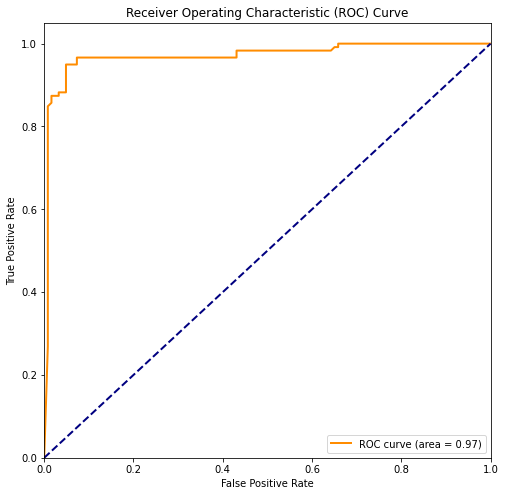 
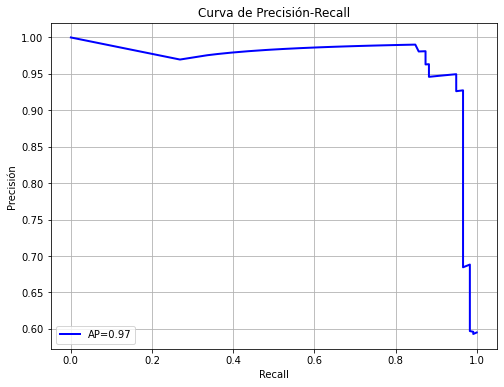
                                         Average Precision (AP): 0.9652
                                         
* Revisando la matriz de confusión, se puede observar que en este modelo se tiene un buen desempeño para los verdaderos y falsos positivos , y hay mayores falsos postivos que falsos negativos, sin embargo ambos falsos nos preocupan debido a que en un caso se le puede dar una receta de alto riesgo de suicidio a quien no lo tenga y por otra parte se le puede decir que no tiene el riesgo a alguien que si lo tenga. Vemos que según la matriz de confusión si sumamos todos los falsos entre todos, nos da que tenemos un 5.78% de error en los falsos.
                                         
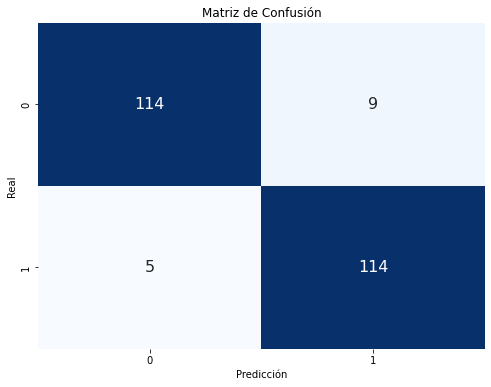

* Por ultimo se ha revisado las curvas de aprendizaje tanto en score accuracy como en error, donde se pueden observar que conforme van pasando los registros de los datasets el entrenamiento va aumentando levemente en el error y con una pendiente negativa la grafica de error de la validación va disminuyendo hasta tener aproximadamente un 10% de diferencia, pasa proporcionalmente a la inversa en la curva de aprendizaje donde se utiliza la puntuación, en la cual la puntuación de el entrenamiento va desmejorando y en la validación llega a tener hasta un 89% aproximadamente, por lo que tienen una diferencia del 10%.

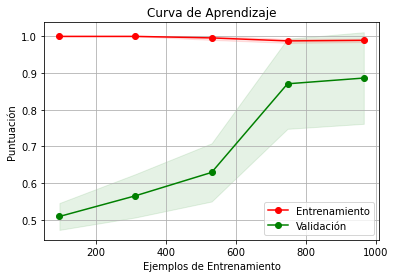

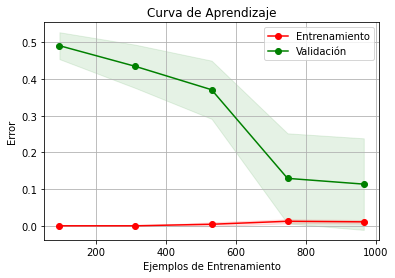

* El modelo tiene un buen desempeño, sin embargo, se encuentra ligeramente sobreentrenado por lo que se debe de revisar el preprocesamiento, la regularización, aumentar las epocas o cv de cortes de dataset para validar, análisis de errores, homogeniedad en la partición de los datos o simplificar el problema. Por lo que para la próxima semana revisaré estos detalles para evitar el overfitting.
